#### source: https://anaconda.org/Sanchitiitr/linear-regression-model/notebook

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [16]:
df = pd.read_csv("Monthly Spending data.csv")

In [17]:
df

,Monthly Income,Monthly Trips,Monthly Spending
0,50000,3,48000
1,45000,2,38550
2,30000,0,22450
3,35000,1,31550
4,39000,2,32650
5,75000,5,71050
6,48000,4,46520
7,42000,3,37540
8,34651,2,32510
9,94520,7,84520


In [18]:
df.describe()

,Monthly Income,Monthly Trips,Monthly Spending
count,36.000000,36.000000,36.000000
mean,45780.388889,2.666667,42542.000000
std,19201.146866,1.756620,19039.818246
min,15000.000000,0.000000,12540.000000
25%,34912.750000,1.000000,32045.000000
50%,46260.000000,3.000000,39800.000000
75%,52475.000000,4.000000,50165.000000
max,94520.000000,7.000000,84520.000000


In [20]:
y = df['Monthly Spending']
X = df
X= X.drop(['Monthly Spending'],axis=1)
# del X['Monthly Spending'] # Same dropping as above can be performed via del function
X

,Monthly Income,Monthly Trips
0,50000,3
1,45000,2
2,30000,0
3,35000,1
4,39000,2
5,75000,5
6,48000,4
7,42000,3
8,34651,2
9,94520,7


In [9]:

X

,Monthly,Monthly Trips
0,50000,3
1,45000,2
2,30000,0
3,35000,1
4,39000,2
5,75000,5
6,48000,4
7,42000,3
8,34651,2
9,94520,7


Text(0, 0.5, 'Monthly Spending')

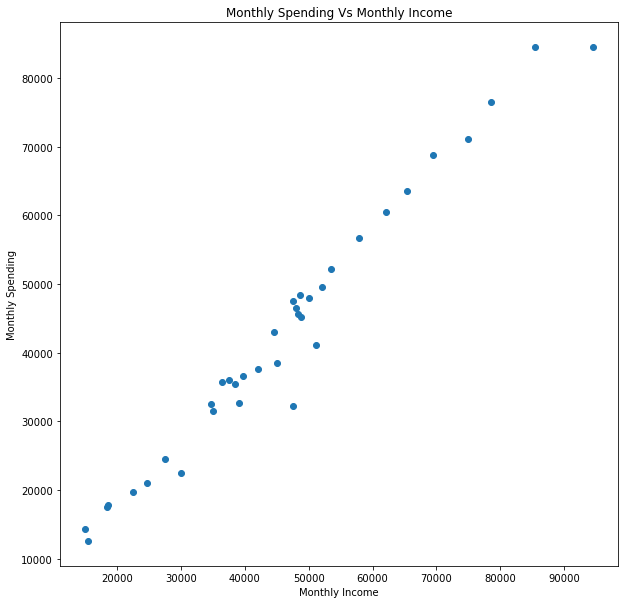

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(X['Monthly'],y)
plt.title("Monthly Spending Vs Monthly Income")
plt.xlabel("Monthly Income")
plt.ylabel("Monthly Spending")

Text(0, 0.5, 'Monthly Spending')

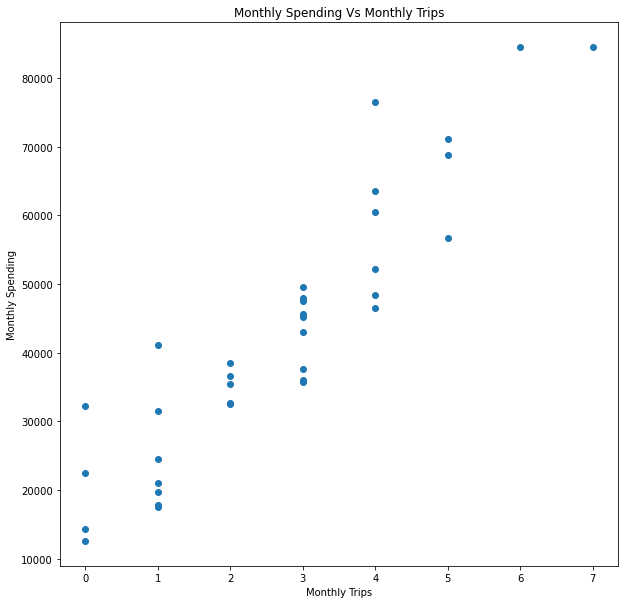

In [22]:
# Visualising data with scatter plot between Montly trips and Monthly spending.

plt.figure(figsize=(10,10))
plt.scatter(X['Monthly Trips'],y)
plt.title("Monthly Spending Vs Monthly Trips")
plt.xlabel("Monthly Trips")
plt.ylabel("Monthly Spending")

In [23]:

# create linear regression object

from sklearn import linear_model
reg = linear_model.LinearRegression()

In [25]:

# splitting the dataset into training and testing sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=123)

In [26]:

# train the model using the training sets

reg.fit(X_train,y_train)

LinearRegression()

In [30]:

# regression coefficients
print('Coefficients:\n',reg.coef_)
# regression intercept
print('Intercept:\n',reg.intercept_)

Coefficients:
 [7.60040025e-01 2.70548966e+03]
Intercept:
 443.0247315036395


In [31]:

# variance score or the R-Squared value: 1 means perfect prediction
print('Variance score: {}'.format(reg.score(X_test,y_test)))

Variance score: 0.997196013888338


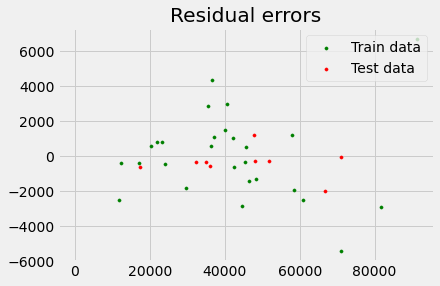

In [35]:

# plot residual error

## setting plot style
plt.style.use('fivethirtyeight')

## plotting residual errors in training data
plt.scatter(reg.predict(X_train),reg.predict(X_train)-y_train,
           color="green",s=10,label='Train data')

## plotting residual errors in test data
plt.scatter(reg.predict(X_test),reg.predict(X_test)-y_test,
           color="red",s=10,label='Test data')

## plotting line for zero residual error
plt.hlines(y=0,xmin=0,xmax=50,linewidth=2)

## plotting legend
plt.legend(loc='upper right')

## plot title
plt.title("Residual errors")

## function to show plot
plt.show()

### Linear Model using Statsmodels

In [36]:

# This is the standad import if you are using "formula notation"

import statsmodels.api as sm

In [37]:

# create a model and fit the data using this model

lm = sm.OLS(y,X).fit()

In [38]:

# print the coefficients
lm.params

Monthly Income       0.774349
Monthly Trips     2638.665608
dtype: float64

In [39]:
# print a summary of the fitted model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Monthly Spending   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              7950.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                    3.94e-46
Time:                        00:49:56   Log-Likelihood:                         -327.28
No. Observations:                  36   AIC:                                      658.6
Df Residuals:                      34   BIC:                                      661.7
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Monthly Income     0.7743      0.025     30.444      0.000       0.723       0.826
Monthly Trips   2638.6656    396.271      6.659      0.000    1833.346    3443.985
==============================================================================
Omnibus:                       11.620   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               13.510
Skew:                          -0.922   Prob(JB):                      0.00117
Kurtosis:                       5.368   Cond. No.                     5.33e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##### Since the p-value of monthly trips is less, it is a more significant variable in predicting monthly spending. We also know this by intution because the more the montly trips, more will be the spending. Whereas more monthly income does not necessarily mean more monthly spending as there could be more saving and less spending.

In [40]:
# create 2 linear models with only one variable at a time

x1 = X['Monthly Income']
x2 = X['Monthly Trips']
lm1 = sm.OLS(y,x1).fit()
lm2 = sm.OLS(y,x2).fit()

In [41]:
# print summary of the model with only monthly income as independent variable.
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Monthly Spending   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              7084.
Date:                Wed, 23 Nov 2022   Prob (F-statistic):                    5.39e-42
Time:                        00:52:44   Log-Likelihood:                         -342.31
No. Observations:                  36   AIC:                                      686.6
Df Residuals:                      35   BIC:                                      688.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Monthly Income     0.9363      0.011     84.169      0.000       0.914       0.959
==============================================================================
Omnibus:                       20.541   Durbin-Watson:                   1.811
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.368
Skew:                          -1.547   Prob(JB):                     2.54e-07
Kurtosis:                       6.267   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### So, we have created 3 models and calculated their R-squared and adjusted R-squared values. We can see that the first model with both monthly income and monthly trips as independent variables has the highest adjusted R-squared value. So the best model out of the three will be the first one.

In [42]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [43]:
df = pd.read_csv(r"D:\IIT ISM Dhanbad\Machine Learning\ML Lab\DataBases\basic_database.csv")
print(df)

     X1       y
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000
5  4300  756000
6  4500  768000


Text(0, 0.5, 'price')

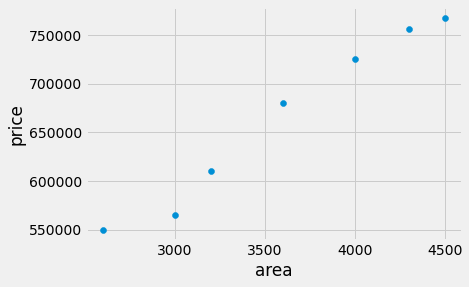

In [44]:
x = df[['X1']]
y= df[['y']]
plt.scatter(x,y)
plt.xlabel('area')
plt.ylabel('price')

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x,y)
print("linear regression intercept: ",regressor.intercept_)
print("linear regression coefficient: ",regressor.coef_)
target_pred=regressor.predict(x)
print("predicted values: ",target_pred)

linear regression intercept:  [208937.67976989]
linear regression coefficient:  [[126.6442953]]
predicted values:  [[538212.84755513]
 [588870.56567593]
 [614199.42473634]
 [664857.14285714]
 [715514.86097795]
 [753508.14956855]
 [778837.00862895]]


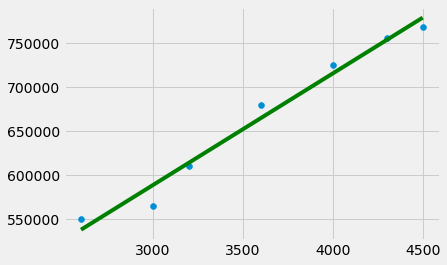

In [46]:
plt.plot(x,target_pred,color='g')
plt.scatter(x,y)

In [52]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
print('Training Dataset:\n',x_train)
print('Test Dataset:\n',x_test)
regressor.fit(x_train,y_train)
print('Intercept:\n',regressor.intercept_)

target_pred = regressor.predict(x_test)
print('Predicted values:\n',target_pred)

Training Dataset:
      X1
1  3000
3  3600
0  2600
5  4300
4  4000
Test Dataset:
      X1
6  4500
2  3200
Intercept:
 [194842.85714286]
Predicted values:
 [[786730.6122449 ]
 [615740.81632653]]


In [53]:
from sklearn import metrics

print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test, target_pred))
print('Mean Square Error : ',metrics.mean_squared_error(y_test,target_pred))
print('Root Mean Square Error : ',np.sqrt(metrics.mean_squared_error(y_test,target_pred)))

Mean Absolute Error :  12235.714285714319
Mean Square Error :  191896403.58184165
Root Mean Square Error :  13852.667742418485


In [54]:
from sklearn.metrics import r2_score
r2_score(y_test,target_pred)

0.9692522987370867

array([[<AxesSubplot:xlabel='area', ylabel='area'>,
        <AxesSubplot:xlabel='bedroom', ylabel='area'>,
        <AxesSubplot:xlabel='age', ylabel='area'>,
        <AxesSubplot:xlabel='price', ylabel='area'>],
       [<AxesSubplot:xlabel='area', ylabel='bedroom'>,
        <AxesSubplot:xlabel='bedroom', ylabel='bedroom'>,
        <AxesSubplot:xlabel='age', ylabel='bedroom'>,
        <AxesSubplot:xlabel='price', ylabel='bedroom'>],
       [<AxesSubplot:xlabel='area', ylabel='age'>,
        <AxesSubplot:xlabel='bedroom', ylabel='age'>,
        <AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='price', ylabel='age'>],
       [<AxesSubplot:xlabel='area', ylabel='price'>,
        <AxesSubplot:xlabel='bedroom', ylabel='price'>,
        <AxesSubplot:xlabel='age', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>]], dtype=object)

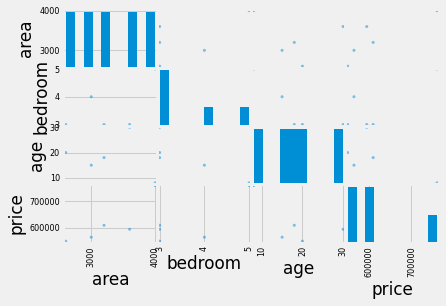

In [55]:
df = pd.read_csv(r"D:\IIT ISM Dhanbad\Machine Learning\ML Lab\DataBases\basic_database2.csv")
df
pd.plotting.scatter_matrix(df)

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(df[['area','bedroom','age']],df.price)
regressor.intercept_
regressor.predict([[3000,3,40]])

array([444400.])

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df[['area','bedroom','age']],df.price,test_size=2,random_state=0)
regressor.fit(x_train,y_train)
print('intercept:\n',regressor.intercept_)
print('cofficients:\n',regressor.coef_)

intercept:
 141624.7300000462
cofficients:
 [  163.12497188   375.06749999 -4499.994375  ]


In [60]:
target_pred = regressor.predict(x_test)
print(target_pred)

[583749.94375001 476874.971875  ]


In [61]:
print('Mean Absolute Error : ',metrics.mean_absolute_error(y_test, target_pred))
print('Mean Square Error : ',metrics.mean_squared_error(y_test,target_pred))
print('Root Mean Square Error : ',np.sqrt(metrics.mean_squared_error(y_test,target_pred)))


from sklearn.metrics import r2_score
r2_score(y_test,target_pred)

Mean Absolute Error :  49687.5421874928
Mean Square Error :  3018167595.704501
Root Mean Square Error :  54937.85212132434


-2.353519550782779